<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>Welcome to Colaboratory!</h1>


Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

With Colaboratory you can write and execute code, save and share your analyses, and access powerful computing resources, all for free from your browser.

In [0]:
import os
import urllib


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/MeghaUkkali9/Advanced-Machine-Learing/master/"
HOUSING_PATH = os.path.join("datasets", "WineCheminalAnaysis")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/WineCheminalAnaysis/winedata.csv"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "winedata.csv")
    urllib.request.urlretrieve(housing_url, tgz_path)

In [0]:
fetch_housing_data()

In [0]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "winedata.csv")
    return pd.read_csv(csv_path)

In [135]:
winedata1 = load_housing_data()
winedata1.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [136]:
winedata1.columns

Index(['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28',
       '2.29', '5.64', '1.04', '3.92', '1065'],
      dtype='object')

In [143]:
csv_path = os.path.join(HOUSING_PATH, "winedata.csv")
wine_cols = ['wine class','Alcohol', 'Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
winedata = pd.read_table(csv_path, sep=',', header=None, names=wine_cols)
winedata.head()

,wine class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [144]:
winedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
wine class                      178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [146]:
winedata["wine class"].value_counts()

2    71
1    59
3    48
Name: wine class, dtype: int64

In [147]:
winedata.describe()

,wine class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


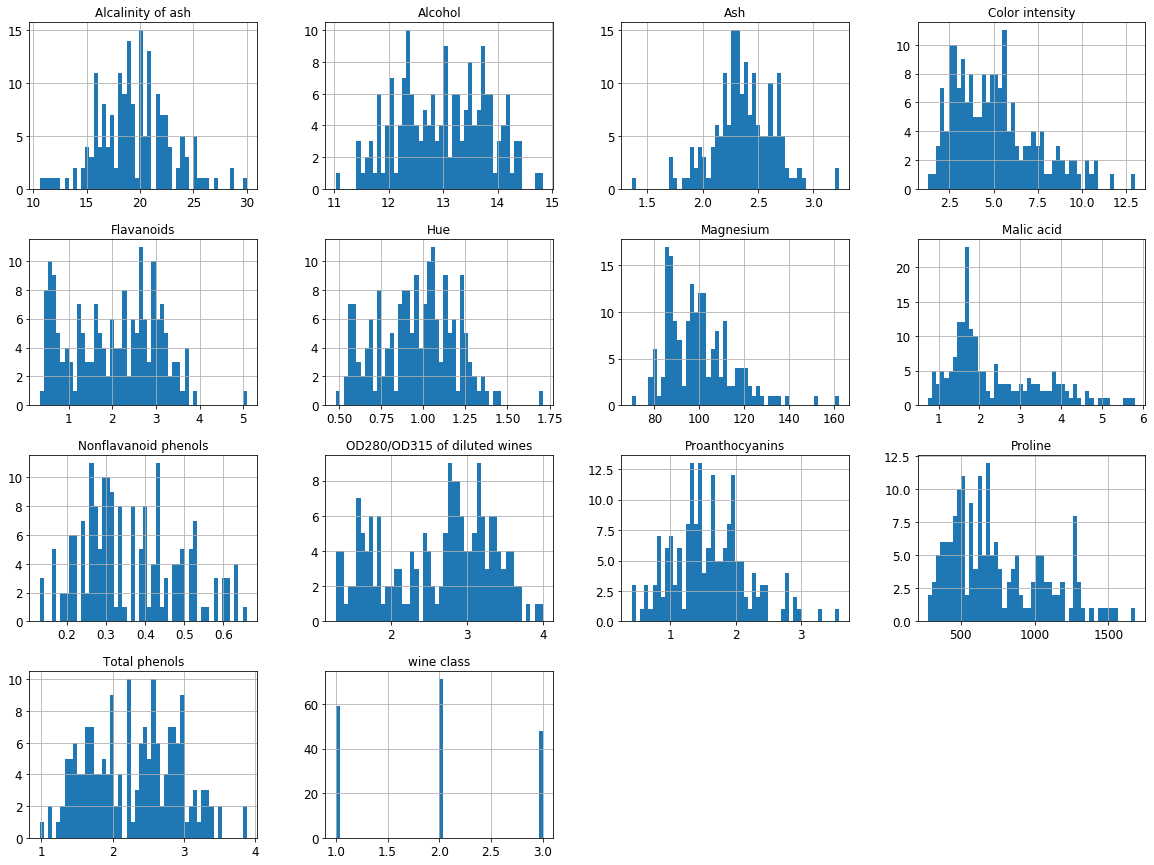

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
winedata.hist(bins=50, figsize=(20,15))
plt.show()

In [149]:
corr_matrix = winedata.corr()
corr_matrix["Flavanoids"].sort_values(ascending=False)

Flavanoids                      1.000000
Total phenols                   0.864564
OD280/OD315 of diluted wines    0.787194
Proanthocyanins                 0.652692
Hue                             0.543479
Proline                         0.494193
Alcohol                         0.236815
Magnesium                       0.195784
Ash                             0.115077
Color intensity                -0.172379
Alcalinity of ash              -0.351370
Malic acid                     -0.411007
Nonflavanoid phenols           -0.537900
wine class                     -0.847498
Name: Flavanoids, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1dfb9479b0>,
      dtype=object)

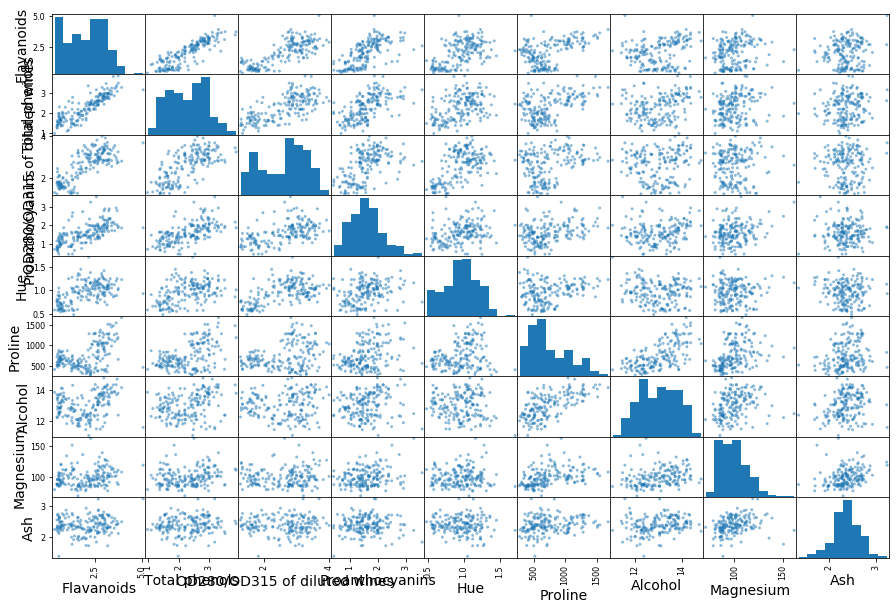

In [152]:
from pandas.plotting import scatter_matrix

attributes = [ "Flavanoids", 
              "Total phenols", "OD280/OD315 of diluted wines","Proanthocyanins","Hue","Proline","Alcohol","Magnesium","Ash" ]
scatter_matrix(winedata[attributes], figsize=(15, 10))

wine class
1    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
2    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
3    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

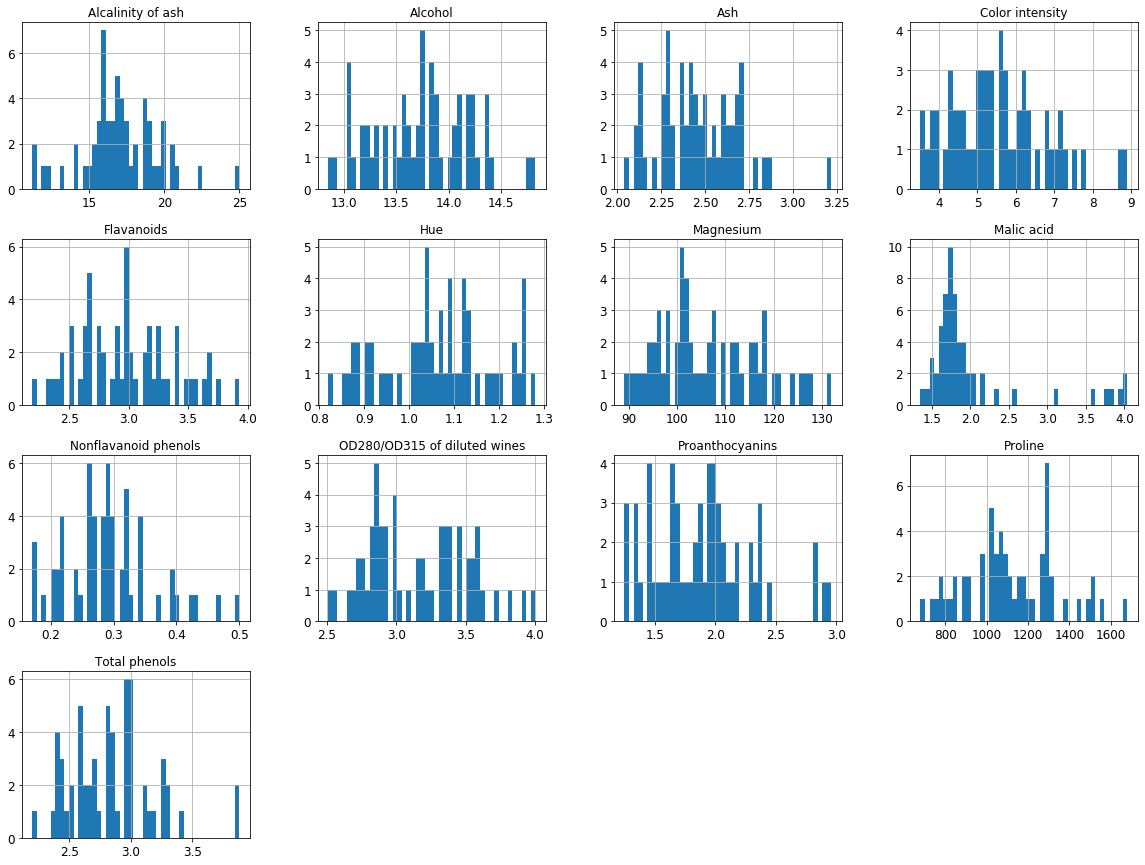

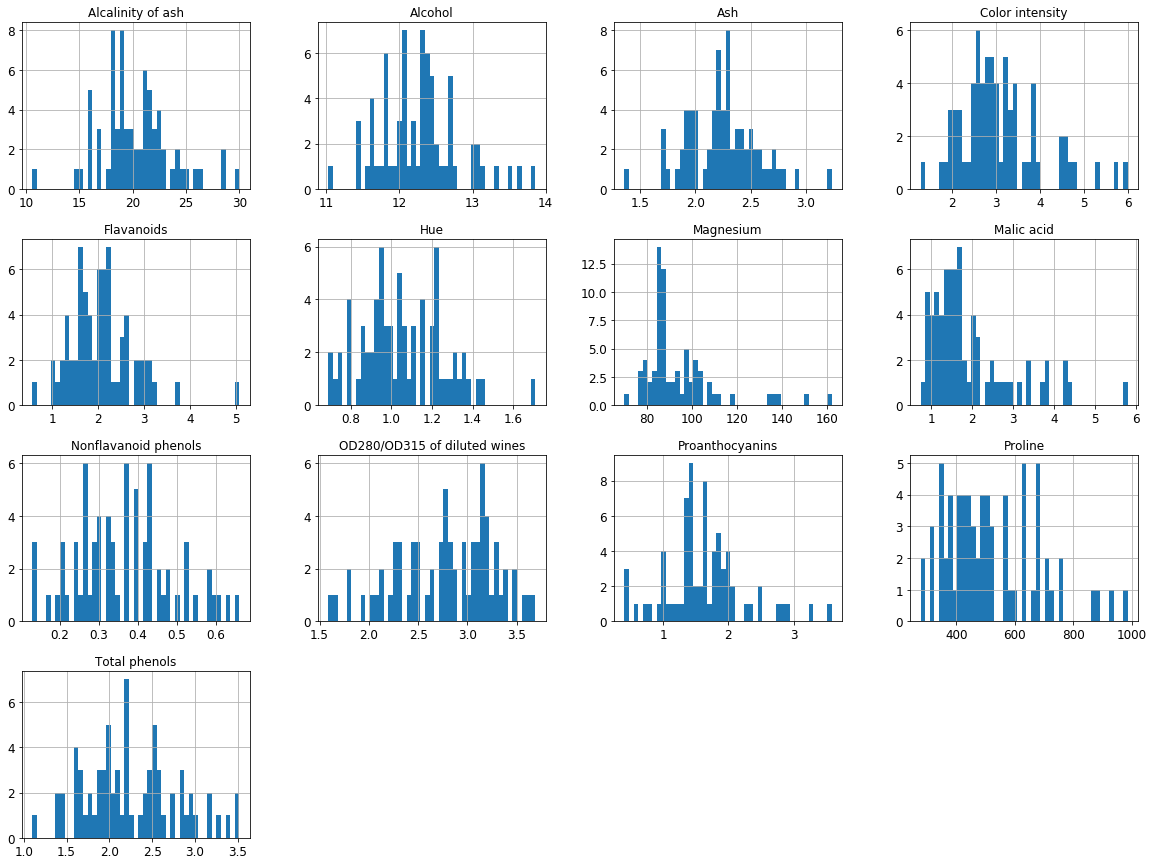

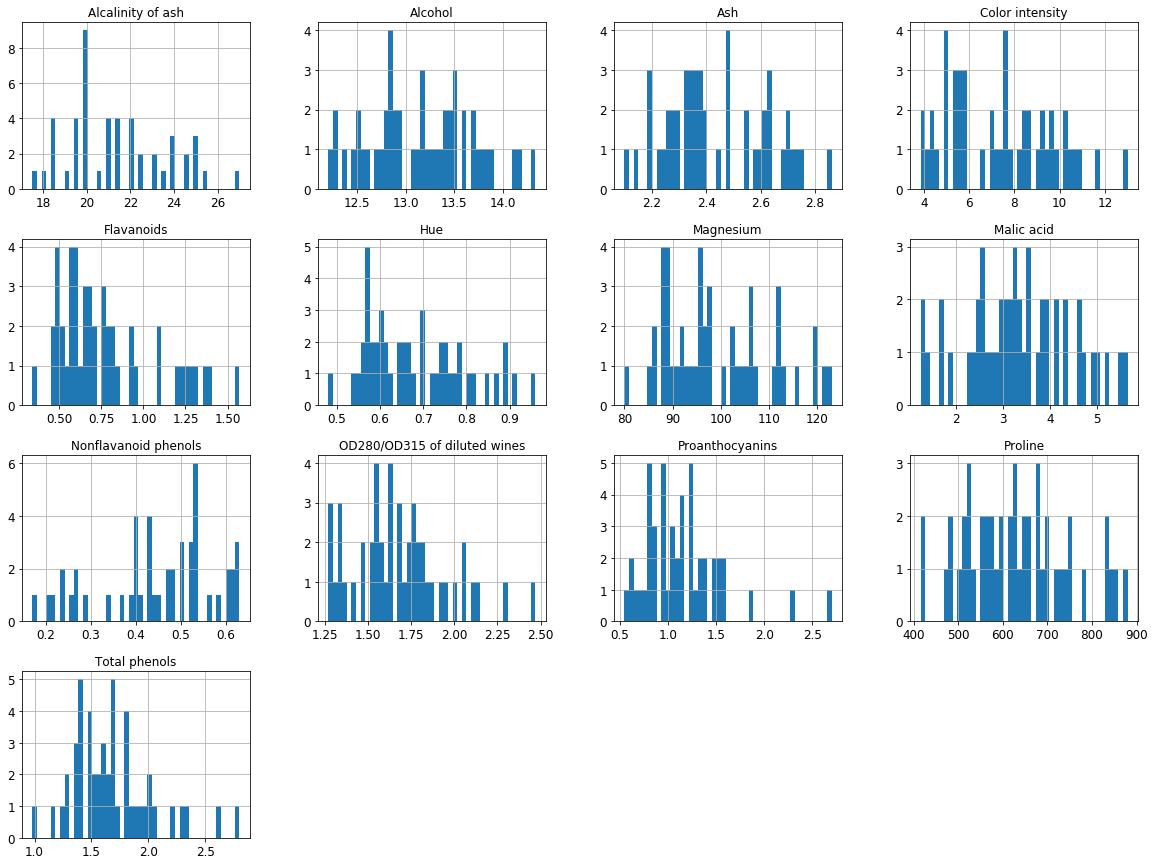

In [158]:
	
winedata.groupby('wine class').hist(bins=45, figsize=(20,15))

wine class
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Flavanoids, dtype: object

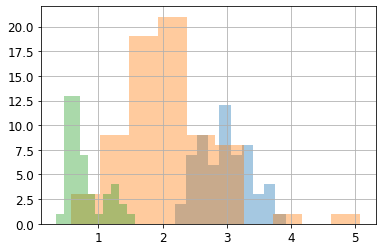

In [165]:

winedata.groupby('wine class').Flavanoids.hist(alpha=0.4)



Follwing 2example from here

In [0]:
# to make this notebook's output identical at every run
import numpy as np

np.random.seed(42)

In [0]:


# For illustration only. Sklearn has train_test_split()
def split_train_test(winedata, test_ratio):
    shuffled_indices = np.random.permutation(len(winedata))
    test_set_size = int(len(winedata) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return winedata.iloc[train_indices], winedata.iloc[test_indices]

In [176]:
train_set, test_set = split_train_test(winedata, 0.2)
len(train_set)

143

In [177]:
len(test_set)

35